# **ASSIGNMENT --> Telecom Churn Analysis & Prediction**

## **Bussiness Overview**
**In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.**

**For many incumbent operators, retaining high profitable customers is the number one business goal.**

**To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.**

**In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.**

### **Points to keep in Mind**
1. In this case study " Indian and Southeast Asian market " is considered.
2. In this case study we need to consider only " usage-based definition ".
3. Approximately 80% of revenue comes from the top 20% customers (called high-value customers).
4. Predict churn only on high-value customers.

## **Business Objective**
**The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.**

 

In [1]:
### Importing all the necessary libraries ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Setting the display options ##
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import xgboost as xgb
import sys

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
### Reading thr Data file ###
tele_data = pd.read_csv("telecom_churn_data.csv",low_memory=False)

In [3]:
### Checking the architecture of the data ###
tele_data.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [4]:
### Checking the initial shape of the data ###
tele_data.shape

(99999, 226)

In [5]:
### Summary/Info for the whole data ###
tele_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

#### Observation: Most of the variables are 'numerical' in type, i.e. 214 columns and 12 columns are 'Date' type.

In [6]:
### Taking a copy of the data for future reference ###
initial_churn_data = tele_data.copy()

In [7]:
### Check the description of all the data ###
tele_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [8]:
### Check for the null values present ###
tele_data.isnull().sum()/tele_data.shape[0]*100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

## Step_1: Data Cleaning

### Select the Recharge columns

In [9]:
recharge_data_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

tele_data[recharge_data_cols].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,7546.000000,4365.000000,4076.000000,4061.000000


#### If the Recharge amount is NAN or null, that constitute that the customers havent recharged for those instances.
#### So, Lets IMPUTE them with 0

In [10]:
tele_data[recharge_data_cols] = tele_data[recharge_data_cols].fillna(0)

In [11]:
### Check for the Null values of the above columns ###
tele_data[recharge_data_cols].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
dtype: int64

#### **Why did I remove null values or impute null values for only the above columns when there were so many columns with null values???**

#### [ANS] Instead of going and cleaning for all directly, I wanted to sort the whole data for only high value customers to make the whole data much small for analysis part releasing the huge memory from the data for the upcoming variables to be assigned.

### **Filtering the High value customers by the below steps::**

In [12]:
### Calculating the total data recharge amount for June and July == number of recharges * average recharge amount ###
tele_data['total_data_rech_6'] = tele_data["total_rech_data_6"] * tele_data["av_rech_amt_data_6"]
tele_data['total_data_rech_7'] = tele_data["total_rech_data_7"] * tele_data["av_rech_amt_data_7"]

In [13]:
### Combining the total recharge amount for June and July == call recharge amount + data recharge amount ###
tele_data['amt_data_6'] = tele_data["total_rech_amt_6"] + tele_data["total_data_rech_6"]
tele_data['amt_data_7'] = tele_data["total_rech_amt_7"] + tele_data["total_data_rech_7"]

In [14]:
### Calculating the average recharge amount for both july and june ###
tele_data['av_amt_data_6_7'] = (tele_data["amt_data_6"] + tele_data["amt_data_7"])/2

In [15]:
### Taking the 70% percentile for filtering the high value customer ###
print("Value of 70% percentile recharge amount :: {0}".format(tele_data["av_amt_data_6_7"].quantile(0.7)))

Value of 70% percentile recharge amount :: 478.0


In [16]:
### Proceeding for filtering the customers who have recharged more than or equal to 478 amount ###
tele_data_filtered = tele_data[tele_data["av_amt_data_6_7"] >= tele_data["av_amt_data_6_7"].quantile(0.7)]
print("Shape of the new filtered data :: {0}".format(tele_data_filtered.shape))

Shape of the new filtered data :: (30001, 231)


In [17]:
### Dropping off the derived variables created to filter out the data ###
tele_data_filtered = tele_data_filtered.drop(['total_data_rech_6', 'total_data_rech_7','amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
print("Shape of the new filtered data :: {0}".format(tele_data_filtered.shape))

Shape of the new filtered data :: (30001, 226)


### Dropping columns having more than 40% null values ###

In [18]:
drop_columns = tele_data_filtered.columns[tele_data_filtered.isnull().sum()/tele_data_filtered.shape[0]*100 > 40]
tele_data_filtered_new = tele_data_filtered.drop(columns=drop_columns)

In [19]:
tele_data_filtered_new.describe()
drop_columns

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6',
       'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'fb_user_9'],
      dtype='object')

In [20]:
### Checking the shape after dropping ###
print("Shape of the new filtered data :: {0}".format(tele_data_filtered_new.shape))

Shape of the new filtered data :: (30001, 194)


In [21]:
tele_data_filtered_new.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,5

In [22]:
id_cols = ["mobile_number","circle_id"]
remaining_date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']

### Dropping of the ID & DATE columns ###
tele_data_filtered_new = tele_data_filtered_new.drop(columns=id_cols+remaining_date_cols)

In [23]:
### Checking the shape after dropping ###
print("Shape of the new filtered data :: {0}".format(tele_data_filtered_new.shape))

Shape of the new filtered data :: (30001, 184)


In [24]:
tele_data_filtered_new.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,29777.0,29777.0,29777.0,30001.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.0,29464.0,28827.0,28100.0,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,30001.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,2

In [25]:
### Checking the amount null values now present ###
tele_data_filtered_new.isnull().sum()

loc_og_t2o_mou         224
std_og_t2o_mou         224
loc_ic_t2o_mou         224
arpu_6                   0
arpu_7                   0
arpu_8                   0
arpu_9                   0
onnet_mou_6            545
onnet_mou_7            537
onnet_mou_8           1174
onnet_mou_9           1901
offnet_mou_6           545
offnet_mou_7           537
offnet_mou_8          1174
offnet_mou_9          1901
roam_ic_mou_6          545
roam_ic_mou_7          537
roam_ic_mou_8         1174
roam_ic_mou_9         1901
roam_og_mou_6          545
roam_og_mou_7          537
roam_og_mou_8         1174
roam_og_mou_9         1901
loc_og_t2t_mou_6       545
loc_og_t2t_mou_7       537
loc_og_t2t_mou_8      1174
loc_og_t2t_mou_9      1901
loc_og_t2m_mou_6       545
loc_og_t2m_mou_7       537
loc_og_t2m_mou_8      1174
loc_og_t2m_mou_9      1901
loc_og_t2f_mou_6       545
loc_og_t2f_mou_7       537
loc_og_t2f_mou_8      1174
loc_og_t2f_mou_9      1901
loc_og_t2c_mou_6       545
loc_og_t2c_mou_7       537
l

In [26]:
### Dropping more columns where the median lies for 0 ###
columns_to_select = tele_data_filtered_new.columns[tele_data_filtered_new.mean() > 2]
tele_data_filtered_final = tele_data_filtered_new[columns_to_select]

In [27]:
tele_data_filtered_final.isnull().sum()/tele_data_filtered_final.shape[0]

arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           0.018166
onnet_mou_7           0.017899
onnet_mou_8           0.039132
onnet_mou_9           0.063365
offnet_mou_6          0.018166
offnet_mou_7          0.017899
offnet_mou_8          0.039132
offnet_mou_9          0.063365
roam_ic_mou_6         0.018166
roam_ic_mou_7         0.017899
roam_ic_mou_8         0.039132
roam_ic_mou_9         0.063365
roam_og_mou_6         0.018166
roam_og_mou_7         0.017899
roam_og_mou_8         0.039132
roam_og_mou_9         0.063365
loc_og_t2t_mou_6      0.018166
loc_og_t2t_mou_7      0.017899
loc_og_t2t_mou_8      0.039132
loc_og_t2t_mou_9      0.063365
loc_og_t2m_mou_6      0.018166
loc_og_t2m_mou_7      0.017899
loc_og_t2m_mou_8      0.039132
loc_og_t2m_mou_9      0.063365
loc_og_t2f_mou_6      0.018166
loc_og_t2f_mou_7      0.017899
loc_og_t2f_mou_8      0.039132
loc_og_t2f_mou_9      0.063365
loc_og_m

In [28]:
tele_data_filtered_final.describe()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,30001.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,28100.000000,30001.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,30001.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.00000,28827.000000,28100.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957,467.124246,265.618262,272.700470,243.646938,225.795019,380.608111,384.994337,348.723294,323.747627,16.408431,12.872921,13.009645,11.249598,27.063178,20.519370,20.674656,16.857094,86.047905,87.235755,81.256858,77.897308,166.263652,165.980922,157.937216,153.245655,6.461494,6.540759,6.126112

### Imputing the values using Simple Imputer of Sklearn ###

In [29]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')
imputed_data = imp.fit_transform(tele_data_filtered_final)
imputed_data.shape

(30001, 132)

In [30]:
churn_data = pd.DataFrame(imputed_data, columns=tele_data_filtered_final.columns)
churn_data.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,88.06,86.885,0.00,65.34,229.635,227.12,0.00,178.185,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,25.58,25.78,0.00,21.74,80.24,81.685,0.00,71.23,0.11,0.21,0.00,0.00,129.35,132.73,0.00,115.25,3.36,3.30,0.00,0.81,18.185,17.75,0.00,9.83,50.795,50.035,0.00,26.585,0.0,0.00,0.00,0.31,0.81,0.00,0.38,0.00,0.00,0.00,0.00,26.03,26.66,0.16,23.98,86.76,88.37,4.13,82.895,2.01,2.16,1.15,1.98,138.63,141.79,5.44,131.70,0.48,0.55,0.00,0.11,5.34,5.54,0.00,4.04,0.00,0.00,0.00,0.0,11.98,12.74,0.00,9.39,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.0,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,968.0,30.40,0.00,101.20,3.58
1,1069.180,1349.850,3171.480,500.000,57.84,54.680,52.29,65.34,453.430,567.16,325.91,178.185,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,21.74,308.63,447.380,162.28,71.23,62.13,55.14,53.23,0.00,422.16,533.91,255.79,115.25,4.30,23.29,12.01,0.81,49.890,31.76,49.14,9.83,60.860,75.140,77.84,26.585,0.0,0.18,10.01,4.50,0.00,6.50,0.38,487.53,609.24,350.16,0.00,58.14,32.26,27.31,23.98,217.56,221.49,121.19,82.895,152.16,101.46,39.53,1.98,427.88,355.23,188.04,131.70,36.89,11.83,30.39,0.11,91.44,126.99,141.33,4.04,52.19,34.24,22.21,0.0,180.54,173.08,193.94,9.39,626.46,558.04,428.74,0.00,2.06,14.53,31.59,0.0,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.0,57.74,19.38,18.74,0.00
2,378.721,492.223,137.362,166.787,413.69,351.030,35.08,33.46,94.660,80.63,136.48,108.710,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,297.13,217.59,12.49,26.13,80.96,70.580,50.54,34.58,0.00,0.00,0.00,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.690,10.04,75.69,74.13,130.260,143.480,98.28,81.460,0.0,0.00,0.00,0.00,0.00,10.23,0.00,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.340,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.0,22.43,4.66,0

In [31]:
churn_data.describe()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957,467.124246,262.392728,269.374484,236.966438,215.627858,377.865524,382.168481,342.809142,314.524116,16.110355,12.642504,12.500551,10.536772,26.571547,20.152086,19.865615,15.788952,84.949441,86.135734,78.986541,74.338925,164.700941,164.472076,154.673714,148.048769,6.346113,6.427442,5.886385

In [32]:
churn_data.isnull().sum()

arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
loc_og_mou_9          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7      0
std_og_t2t_mou_8      0
std_og_t2t_mou_9      0
std_og_t2m_mou_6      0
std_og_t2m_mou_7

#### Hereby, we get the Cleaned data from all the available discrepancies.
#### Next Step is to find the churn based on the incoming and outgoing data.

In [33]:
#### Saving the Data for future references ####
churn_data.to_csv("Cleaned_churn_data.csv",index=False)

In [34]:
#### Re-reading the cleaned file ####
churn_data = pd.read_csv("cleaned_churn_data.csv",low_memory=False)

In [35]:
churn_data.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,88.06,86.885,0.00,65.34,229.635,227.12,0.00,178.185,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,25.58,25.78,0.00,21.74,80.24,81.685,0.00,71.23,0.11,0.21,0.00,0.00,129.35,132.73,0.00,115.25,3.36,3.30,0.00,0.81,18.185,17.75,0.00,9.83,50.795,50.035,0.00,26.585,0.0,0.00,0.00,0.31,0.81,0.00,0.38,0.00,0.00,0.00,0.00,26.03,26.66,0.16,23.98,86.76,88.37,4.13,82.895,2.01,2.16,1.15,1.98,138.63,141.79,5.44,131.70,0.48,0.55,0.00,0.11,5.34,5.54,0.00,4.04,0.00,0.00,0.00,0.0,11.98,12.74,0.00,9.39,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.0,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,968.0,30.40,0.00,101.20,3.58
1,1069.180,1349.850,3171.480,500.000,57.84,54.680,52.29,65.34,453.430,567.16,325.91,178.185,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,21.74,308.63,447.380,162.28,71.23,62.13,55.14,53.23,0.00,422.16,533.91,255.79,115.25,4.30,23.29,12.01,0.81,49.890,31.76,49.14,9.83,60.860,75.140,77.84,26.585,0.0,0.18,10.01,4.50,0.00,6.50,0.38,487.53,609.24,350.16,0.00,58.14,32.26,27.31,23.98,217.56,221.49,121.19,82.895,152.16,101.46,39.53,1.98,427.88,355.23,188.04,131.70,36.89,11.83,30.39,0.11,91.44,126.99,141.33,4.04,52.19,34.24,22.21,0.0,180.54,173.08,193.94,9.39,626.46,558.04,428.74,0.00,2.06,14.53,31.59,0.0,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.0,57.74,19.38,18.74,0.00
2,378.721,492.223,137.362,166.787,413.69,351.030,35.08,33.46,94.660,80.63,136.48,108.710,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,297.13,217.59,12.49,26.13,80.96,70.580,50.54,34.58,0.00,0.00,0.00,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.690,10.04,75.69,74.13,130.260,143.480,98.28,81.460,0.0,0.00,0.00,0.00,0.00,10.23,0.00,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.340,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.0,22.43,4.66,0

In [36]:
churn_data.shape

(30001, 132)

## Step_2: Data PreProcessing (PART-1)

#### **Derive the churn column** ####

In [37]:
### Calculating the total calls for 9th month ###
churn_data["total_calls_mou_9"] = churn_data["total_ic_mou_9"] + churn_data["total_og_mou_9"]

In [38]:
### Calculating total internet consumption ###
churn_data["total_internet_mb_9"] = churn_data["vol_2g_mb_9"] + churn_data["vol_3g_mb_9"]

In [39]:
### Creating a churn column == 0 : NOT CHURN; 1: CHURN ####
churn_data['churn'] = churn_data.apply(lambda x: 1 if (x["total_calls_mou_9"] == 0 and x["total_internet_mb_9"] == 0) else 0, axis=1)

In [40]:
churn_data.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_calls_mou_9,total_internet_mb_9,churn
0,197.385,214.816,213.803,21.100,88.06,86.885,0.00,65.34,229.635,227.12,0.00,178.185,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,25.58,25.78,0.00,21.74,80.24,81.685,0.00,71.23,0.11,0.21,0.00,0.00,129.35,132.73,0.00,115.25,3.36,3.30,0.00,0.81,18.185,17.75,0.00,9.83,50.795,50.035,0.00,26.585,0.0,0.00,0.00,0.31,0.81,0.00,0.38,0.00,0.00,0.00,0.00,26.03,26.66,0.16,23.98,86.76,88.37,4.13,82.895,2.01,2.16,1.15,1.98,138.63,141.79,5.44,131.70,0.48,0.55,0.00,0.11,5.34,5.54,0.00,4.04,0.00,0.00,0.00,0.0,11.98,12.74,0.00,9.39,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.0,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,968.0,30.40,0.00,101.20,3.58,0.00,0.00,1
1,1069.180,1349.850,3171.480,500.000,57.84,54.680,52.29,65.34,453.430,567.16,325.91,178.185,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,21.74,308.63,447.380,162.28,71.23,62.13,55.14,53.23,0.00,422.16,533.91,255.79,115.25,4.30,23.29,12.01,0.81,49.890,31.76,49.14,9.83,60.860,75.140,77.84,26.585,0.0,0.18,10.01,4.50,0.00,6.50,0.38,487.53,609.24,350.16,0.00,58.14,32.26,27.31,23.98,217.56,221.49,121.19,82.895,152.16,101.46,39.53,1.98,427.88,355.23,188.04,131.70,36.89,11.83,30.39,0.11,91.44,126.99,141.33,4.04,52.19,34.24,22.21,0.0,180.54,173.08,193.94,9.39,626.46,558.04,428.74,0.00,2.06,14.53,31.59,0.0,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.0,57.74,19.38,18.74,0.00,0.00,0.00,1
2,378.721,492.223,137.362,166.787,413.69,351.030,35.08,33.46,94.660,80.63,136.48,108.710,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,297.13,217.59,12.49,26.13,80.96,70.580,50.54,34.58,0.00,0.00,0.00,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.690,10.04,75.69,74.13,130.260,143.480,98.28,81.460,0.0,0.00,0.00,0.00,0.00,10.23,0.00,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.340,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,

In [41]:
### Dropping off the derived variables created ###
churn_data = churn_data.drop(columns=['total_calls_mou_9', 'total_internet_mb_9'])

In [42]:
### Shape of the data NOW ###
print("Shape of the churned data represents :: {0}".format(churn_data.shape))

Shape of the churned data represents :: (30001, 133)


In [43]:
### Changing the datatype of churn to categorical features ###
churn_data["churn"] = churn_data["churn"].astype("category")

### Checking Ratio of Churn for the balance ###

In [44]:
print("Ratio of Churn :: \n{0}".format(churn_data["churn"].value_counts()/churn_data.shape[0]*100))

Ratio of Churn :: 
0    91.863605
1     8.136395
Name: churn, dtype: float64


In [45]:
### Dropping the 9th month columns ###
cols_9th = churn_data.filter(regex='9$',axis=1).columns

In [46]:
### Taking the Columns not belonging to 9th month ###
churn_data_filtered = churn_data.drop(columns=cols_9th)

In [47]:
### Check the shape & head of the final filtered columns ###
print("Shape of the filtered churn data :: {0}".format(churn_data_filtered.shape))

Shape of the filtered churn data :: (30001, 102)


In [48]:
churn_data_filtered.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,197.385,214.816,213.803,88.06,86.885,0.00,229.635,227.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.58,25.78,0.00,80.24,81.685,0.00,0.11,0.21,0.00,129.35,132.73,0.00,3.36,3.30,0.00,18.185,17.75,0.00,50.795,50.035,0.00,0.0,0.00,0.00,0.31,0.81,0.00,0.00,0.00,0.00,26.03,26.66,0.16,86.76,88.37,4.13,2.01,2.16,1.15,138.63,141.79,5.44,0.48,0.55,0.00,5.34,5.54,0.00,0.00,0.00,0.00,11.98,12.74,0.00,0.00,0.00,5.44,0.00,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,968.0,30.40,0.00,101.20,3.58,1
1,1069.180,1349.850,3171.480,57.84,54.680,52.29,453.430,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.380,162.28,62.13,55.14,53.23,422.16,533.91,255.79,4.30,23.29,12.01,49.890,31.76,49.14,60.860,75.140,77.84,0.0,0.18,10.01,4.50,0.00,6.50,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,2.06,14.53,31.59,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,802.0,57.74,19.38,18.74,0.00,1
2,378.721,492.223,137.362,413.69,351.030,35.08,94.660,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.580,50.54,0.00,0.00,0.00,378.09,288.18,63.04,116.56,133.43,22.58,13.690,10.04,75.69,130.260,143.480,98.28,0.0,0.00,0.00,0.00,0.00,10.23,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,315.0,21.03,910.65,122.16,0.00,0
3,514.453,597.753,637.760,102.41,132.110,85.14,757.930,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.930,104.81,0.75,0.00,1.58,97.04,94.09,129.74,97.93,125.94,61.79,665.360,808.74,876.99,763.290,934.690,938.79,0.0,0.00,0.00,0.00,0.00,0.00,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.00,0.00,22.0,26.0,27.0,600.0,680.0,718.0,50.0,50.0,50.0,30.0,20.0,50.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,720.0,0.00,0.00,0.00,0.00,0
4,74.350,193.897,366.966,48.96,50.660,33.58,85.410,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.010

In [49]:
## Also dropping the sep_vbc_3g as it belongs to the churn month ##
churn_data_filtered = churn_data_filtered.drop(columns="sep_vbc_3g")

In [50]:
### Checking the head once again ##
churn_data_filtered.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
0,197.385,214.816,213.803,88.06,86.885,0.00,229.635,227.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.58,25.78,0.00,80.24,81.685,0.00,0.11,0.21,0.00,129.35,132.73,0.00,3.36,3.30,0.00,18.185,17.75,0.00,50.795,50.035,0.00,0.0,0.00,0.00,0.31,0.81,0.00,0.00,0.00,0.00,26.03,26.66,0.16,86.76,88.37,4.13,2.01,2.16,1.15,138.63,141.79,5.44,0.48,0.55,0.00,5.34,5.54,0.00,0.00,0.00,0.00,11.98,12.74,0.00,0.00,0.00,5.44,0.00,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,968.0,30.40,0.00,101.20,1
1,1069.180,1349.850,3171.480,57.84,54.680,52.29,453.430,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.380,162.28,62.13,55.14,53.23,422.16,533.91,255.79,4.30,23.29,12.01,49.890,31.76,49.14,60.860,75.140,77.84,0.0,0.18,10.01,4.50,0.00,6.50,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,2.06,14.53,31.59,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,802.0,57.74,19.38,18.74,1
2,378.721,492.223,137.362,413.69,351.030,35.08,94.660,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.580,50.54,0.00,0.00,0.00,378.09,288.18,63.04,116.56,133.43,22.58,13.690,10.04,75.69,130.260,143.480,98.28,0.0,0.00,0.00,0.00,0.00,10.23,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,315.0,21.03,910.65,122.16,0
3,514.453,597.753,637.760,102.41,132.110,85.14,757.930,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.930,104.81,0.75,0.00,1.58,97.04,94.09,129.74,97.93,125.94,61.79,665.360,808.74,876.99,763.290,934.690,938.79,0.0,0.00,0.00,0.00,0.00,0.00,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.00,0.00,22.0,26.0,27.0,600.0,680.0,718.0,50.0,50.0,50.0,30.0,20.0,50.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,720.0,0.00,0.00,0.00,0
4,74.350,193.897,366.966,48.96,50.660,33.58,85.410,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.010,148.56,0.00,0.00,0.00,131.91,1

In [51]:
### Saving the data for future reference ###
churn_data_filtered.to_csv("filtered_churn.csv",index=False)

##### **Hence forth, initial data cleaning is completed and we would proceed for EDA to check for the outliers.** #####

## Step_3: Data Visualization

In [52]:
churn_data_filtered.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957,262.392728,269.374484,236.966438,377.865524,382.168481,342.809142,16.110355,12.642504,12.500551,26.571547,20.152086,19.865615,84.949441,86.135734,78.986541,164.700941,164.472076,154.673714,6.346113,6.427442,5.886385,256.430168,257.492080,240.457671,165.946334,174.293040,148.497133,179.763738,188.238482,157.829827,348.048701,364.880104,308.658150,2.171525,2.105743,1.948970,5.823902,7.123145,6.583031,609.866251,628.366047,551.678812,65.926147,67.114129,63.588341,151.988480,153.206980,149.589868,15.314981,16.074229,14.481830,233.672137,236.845368,228.648855,14.903499,15.431348,13.924662,29.292222,30.921680,28.095169,2.695855,2.798443,2.561970,47.007063,49.274152,44.814105,289.950496,296.756987,279.922931,10.784689,11.875796,10.998257,11.851005,11.718843,9.972868,660.732342,660.498017,584.365454,169.284824,172.201727,160.144462,100.893604,100.356021,92.393654,130.654329,139.781778,122.132258,126.522185,125.097326,105.913072,344.258568,370.196701,351.493998,1209.368754,169.138860,178.872765,158.523962
std,460.640461,479.776947,501.961981,458.886532,479.263904,457.207614,480.262085,496.746629,478.194983,76.302156,75.785903,74.125281,116.205525,96.100428,104.719009,228.

### **Univariate Plots**

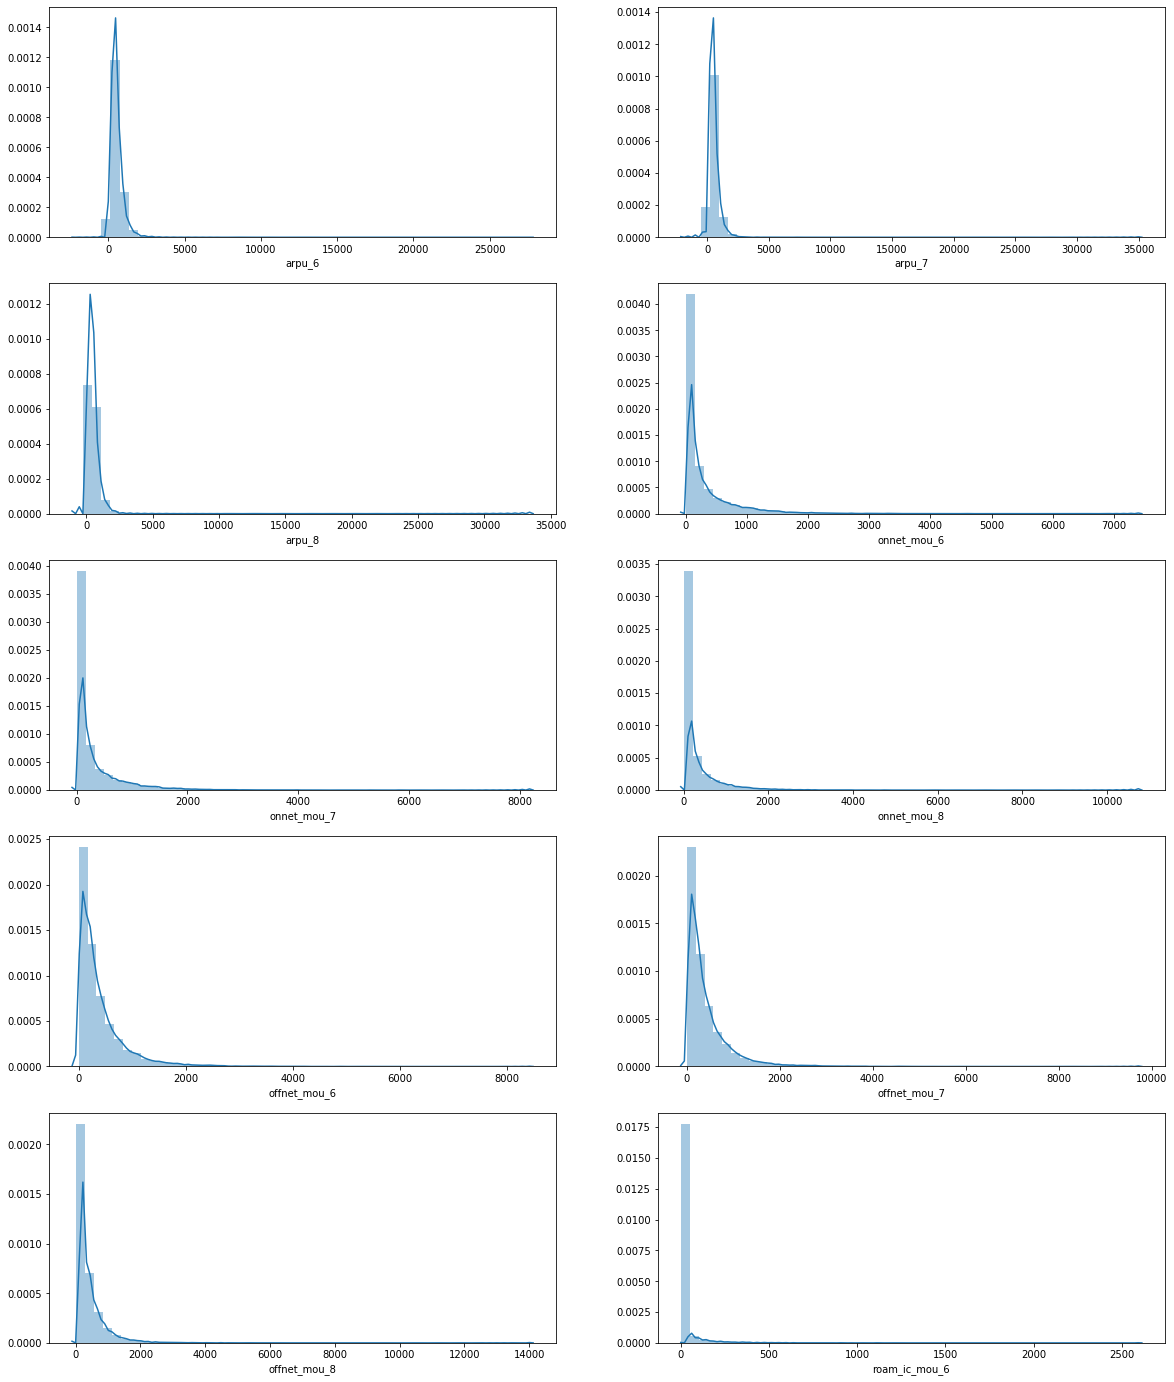

In [53]:
plt.figure(figsize=(20,50))
for index,cols in enumerate(churn_data_filtered.columns[:10]):
    if cols != "churn":
        plt.subplot(10,2,index+1)
        sns.distplot(churn_data_filtered[cols])

#### Most of the plots and columns are very left skewed, indicating the effect of outliers. Hence, they need to be scaled out.

### **Bivariate Plots** ###

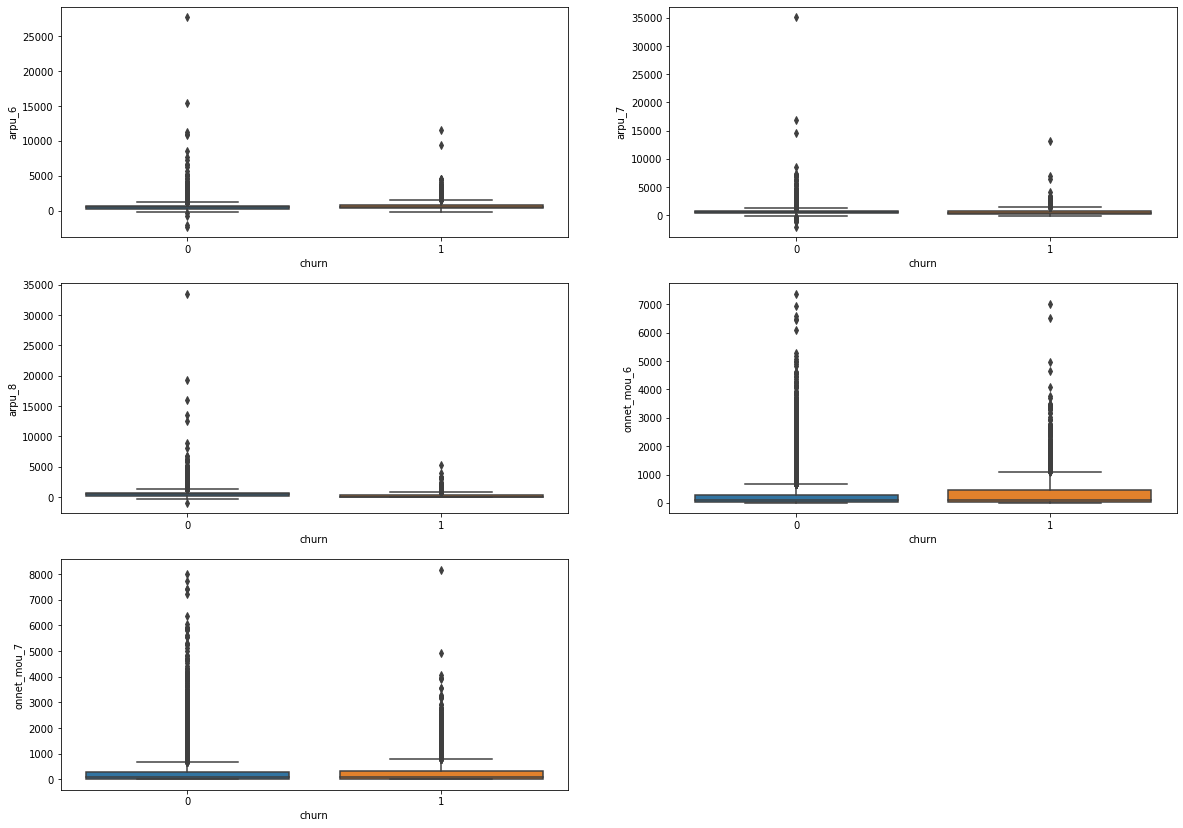

In [54]:
plt.figure(figsize=(20,50))
for index,cols in enumerate(churn_data_filtered.columns[:5]):
    if cols != "churn":
        plt.subplot(10,2,index+1)
        sns.boxplot(x="churn",y=cols,data=churn_data_filtered)

#### Looking at the boxplot we can identify, how so many outliers lie and hence scaling is definitely needed. ###

In [55]:
#### Read the cleaned file ####
churn_cleaned = pd.read_csv("filtered_churn.csv")

In [56]:
churn_cleaned.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957,262.392728,269.374484,236.966438,377.865524,382.168481,342.809142,16.110355,12.642504,12.500551,26.571547,20.152086,19.865615,84.949441,86.135734,78.986541,164.700941,164.472076,154.673714,6.346113,6.427442,5.886385,256.430168,257.492080,240.457671,165.946334,174.293040,148.497133,179.763738,188.238482,157.829827,348.048701,364.880104,308.658150,2.171525,2.105743,1.948970,5.823902,7.123145,6.583031,609.866251,628.366047,551.678812,65.926147,67.114129,63.588341,151.988480,153.206980,149.589868,15.314981,16.074229,14.481830,233.672137,236.845368,228.648855,14.903499,15.431348,13.924662,29.292222,30.921680,28.095169,2.695855,2.798443,2.561970,47.007063,49.274152,44.814105,289.950496,296.756987,279.922931,10.784689,11.875796,10.998257,11.851005,11.718843,9.972868,660.732342,660.498017,584.365454,169.284824,172.201727,160.144462,100.893604,100.356021,92.393654,130.654329,139.781778,122.132258,126.522185,125.097326,105.913072,344.258568,370.196701,351.493998,1209.368754,169.138860,178.872765,158.523962,0.081364
std,460.640461,479.776947,501.961981,458.886532,479.263904,457.207614,480.262085,496.746629,478.194983,76.302156,75.785903,74.125281,116.2055

### Splitting the data using train_test_split


In [57]:
X = churn_cleaned.drop(columns="churn")
y = churn_cleaned["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [58]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (21000, 100)
y_train shape: (21000,)
X_test shape: (9001, 100)
y_test shape: (9001,)


## Step_4: Data PreProcessing (Part-2) ##

In [59]:
### Scaling the data using Standard scaler ###
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Applying PCA for feature reduction** ###

In [60]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [61]:
pca.components_

array([[ 1.70245950e-01,  1.78336350e-01,  1.74787818e-01, ...,
        -1.01073421e-02, -1.63583010e-02, -1.55541960e-02],
       [ 2.60954972e-02,  4.03513439e-02,  2.39773043e-02, ...,
        -8.58406516e-02, -8.46226590e-02, -8.33742585e-02],
       [ 1.67348731e-01,  1.92559750e-01,  1.95870447e-01, ...,
         1.85618043e-01,  1.86676224e-01,  1.79033692e-01],
       ...,
       [-1.12508127e-06,  3.66069116e-08, -5.77209634e-07, ...,
         1.72420597e-07, -2.27593302e-07,  1.51034708e-07],
       [ 4.54904457e-07,  2.66380492e-07, -6.47902153e-07, ...,
         9.91298576e-08, -7.89499750e-08, -2.45169249e-09],
       [-4.63499610e-07, -1.15907731e-07, -4.36812676e-07, ...,
         2.35369798e-08,  6.27763102e-08, -8.16136292e-08]])

In [62]:
pca.explained_variance_ratio_

array([1.37189600e-01, 1.06421531e-01, 6.97611968e-02, 5.86063628e-02,
       4.63465030e-02, 4.07606374e-02, 3.78372518e-02, 3.32580838e-02,
       3.19119088e-02, 2.61317780e-02, 2.51033937e-02, 2.40717195e-02,
       2.28571520e-02, 2.18659388e-02, 2.06627876e-02, 1.87385987e-02,
       1.78970218e-02, 1.59556983e-02, 1.31388593e-02, 1.22615906e-02,
       1.19228916e-02, 1.08790273e-02, 9.81850469e-03, 9.54341560e-03,
       8.75525676e-03, 8.66549519e-03, 8.19888745e-03, 7.80154644e-03,
       7.31720817e-03, 7.06463189e-03, 6.84796608e-03, 6.50292940e-03,
       5.89514581e-03, 5.60178882e-03, 5.44008354e-03, 5.28088297e-03,
       5.20733094e-03, 4.81318675e-03, 4.72036933e-03, 4.16604258e-03,
       3.96802930e-03, 3.84787761e-03, 3.69104346e-03, 3.49739454e-03,
       3.39613250e-03, 3.10696614e-03, 3.08817048e-03, 3.03533030e-03,
       3.00266830e-03, 2.90007838e-03, 2.82447727e-03, 2.72026295e-03,
       2.61865017e-03, 2.57045044e-03, 2.30233039e-03, 2.28472036e-03,
      

In [63]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

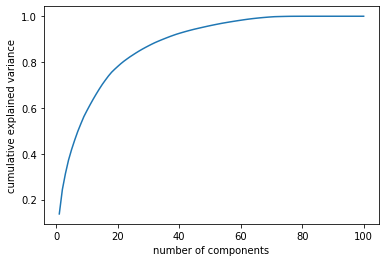

In [64]:
sns.lineplot(range(1,len(var_cumu)+1), var_cumu)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [65]:
print(list(zip(var_cumu,range(1,len(X_train_scaled)+1))))

[(0.13718959975689538, 1), (0.24361113112017357, 2), (0.3133723279673365, 3), (0.3719786907949897, 4), (0.4183251938162978, 5), (0.45908583124819663, 6), (0.4969230830061097, 7), (0.530181166817582, 8), (0.5620930756191681, 9), (0.5882248535799113, 10), (0.6133282472365126, 11), (0.6373999667678187, 12), (0.6602571187840571, 13), (0.6821230576320609, 14), (0.7027858452297773, 15), (0.721524443939226, 16), (0.7394214657691319, 17), (0.7553771641082958, 18), (0.7685160233843787, 19), (0.7807776139793821, 20), (0.792700505584249, 21), (0.8035795328502661, 22), (0.8133980375371103, 23), (0.8229414531407624, 24), (0.8316967099022163, 25), (0.8403622050962349, 26), (0.8485610925418854, 27), (0.8563626389838345, 28), (0.8636798471562737, 29), (0.8707444790484161, 30), (0.8775924451298773, 31), (0.8840953745265855, 32), (0.8899905203395517, 33), (0.8955923091639818, 34), (0.9010323927057653, 35), (0.9063132756777643, 36), (0.9115206066157547, 37), (0.9163337933644683, 38), (0.9210541626911133,

#### As, it can be seen that 65 components can easily give us 99% of the variance in the data

In [66]:
### Now, Let's select 65 components ###
pca = PCA(n_components=65)

X_train_pca_data = pca.fit_transform(X_train_scaled)
X_test_pca_data = pca.transform(X_test_scaled)

In [67]:
#Maximum and minimum correlations after PCA
corr = np.corrcoef(X_train_pca_data.transpose())
corr_nodiag = corr - np.diagflat(corr.diagonal())
print("max_corr:", corr_nodiag.max(), "\nmin_corr:", corr_nodiag.min(),)


max_corr: 1.0236384748845099e-15 
min_corr: -1.4022373371480513e-15


In [68]:
X_test_pca_data.shape

(9001, 65)

## Step_5: Model Building and Evaluation ##

In [69]:
### Let's check the imbalance of the data ###
y_train.value_counts()/y_train.shape *100

0    91.947619
1     8.052381
Name: churn, dtype: float64

In [70]:
log_reg_pca = LogisticRegression(class_weight='balanced') #class_weight='balanced' was used due to class imbalance in the dataset
model_lr_pca = log_reg_pca.fit(X_train_pca_data, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [71]:
#predictions on train dataset
pred_train_model = model_lr_pca.predict_proba(X_train_pca_data)
y_pred_train = model_lr_pca.predict(X_train_pca_data)

#predictions on test dataset
pred_test_model = model_lr_pca.predict_proba(X_test_pca_data)
y_pred_test = model_lr_pca.predict(X_test_pca_data)

In [72]:
#View Confusion Matrix
print(confusion_matrix(y_train, y_pred_train))
print('Accuracy Score{train dataset}:', accuracy_score(y_train, y_pred_train))
print('Accuracy Score{test dataset}:', accuracy_score(y_test, y_pred_test))

[[15388  3921]
 [  277  1414]]
Accuracy Score{train dataset}: 0.8000952380952381
Accuracy Score{test dataset}: 0.8065770469947784


In [73]:
#convert array to dataframe
y_pred_df = pd.DataFrame(pred_train_model) 
y_pred_df_test = pd.DataFrame(pred_test_model)

#Convert to column dataframe
y_pred = y_pred_df.iloc[:,[1]] 
y_pred_test = y_pred_df_test.iloc[:,[1]]

y_pred.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_pred_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_train, y_pred], axis=1)
y_pred_final_test = pd.concat([y_test, y_pred_test], axis=1)
 
y_pred_final = y_pred_final.rename(columns = { 1 : 'churn_prob'}) #Renaming the column
y_pred_final_test = y_pred_final_test.rename(columns = { 1 : 'churn_prob'})

In [74]:
#Check ROC
def view_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_sc = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_sc )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [75]:
#AUC
fpr, tpr, thresholds =roc_curve(y_pred_final.churn, y_pred_final.churn_prob)
auc = auc(fpr, tpr)
print('AUC Score:', auc)

AUC Score: 0.8813179258214603


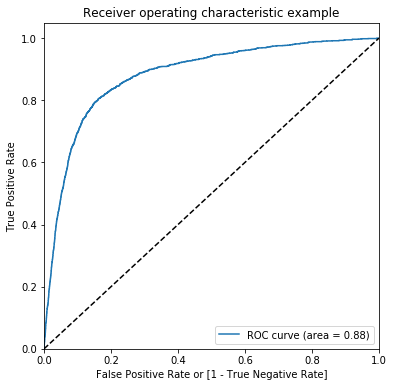

(array([0.00000000e+00, 0.00000000e+00, 5.17893210e-05, ...,
        9.99896421e-01, 9.99948211e-01, 1.00000000e+00]),
 array([0.00000000e+00, 5.91366056e-04, 5.91366056e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99958508e+00, 9.99585082e-01, 9.98929803e-01, ...,
        3.89389901e-11, 7.63971338e-12, 1.47785904e-15]))

In [76]:
#View ROC Curve by plotting the true positive rate against the false positive rate
view_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [77]:
num = [float(x)/10 for x in range(10)]
for i in num:
    y_pred_final[i] = y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)

In [78]:
#Let's find out the accuracy, sensitivity and specificity for various probability cutoffs.
cut_off = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm_1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm_1))
    accuracy = (cm_1[0,0]+cm_1[1,1])/total1
    sensitivity = cm_1[0,0]/(cm_1[0,0]+cm_1[0,1])
    specificity = cm_1[1,1]/(cm_1[1,0]+cm_1[1,1])
    cut_off.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cut_off)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.080524     0.000000     1.000000
0.1          0.1  0.364429     0.310995     0.974571
0.2          0.2  0.513190     0.475167     0.947368
0.3          0.3  0.629048     0.603708     0.918391
0.4          0.4  0.723476     0.708996     0.888823
0.5          0.5  0.800095     0.796934     0.836192
0.6          0.6  0.856000     0.863483     0.770550
0.7          0.7  0.890952     0.911181     0.659965
0.8          0.8  0.914048     0.953597     0.462448
0.9          0.9  0.920714     0.984463     0.192785


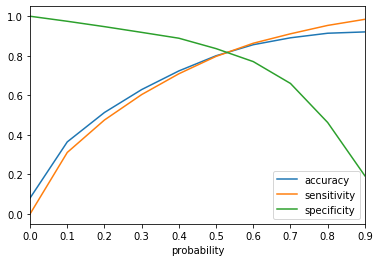

In [79]:
#Let's view the differentiation between accuracy, sensitivity and specificity
cut_off.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])

In [80]:
#Now find out optimal probability threshold

def Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_th = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_th['threshold'])

threshold = Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.5296860977097873]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [81]:
#Create a new column 'churn_pred1' : if the churn_prob > 0.50 we put '1' and if it's < 0.50 we put '0' 
y_pred_final['churn_pred1'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.50 else 0)

y_pred_final.churn.value_counts()

0    19309
1     1691
Name: churn, dtype: int64

In [82]:
conf_mtx = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.churn_pred1)
conf_mtx

array([[15388,  3921],
       [  277,  1414]])

In [83]:
#churn prediction in train data
TP = conf_mtx[1,1] #true positive 
TN = conf_mtx[0,0] #true negative
FP = conf_mtx[0,1] #false positive
FN = conf_mtx[1,0] #false negative

print('Accuracy Score:', accuracy_score(y_train, y_pred_final['churn_pred1']))
print('Sensitivity:', TP/float(TP+FN))
print('Specificity:', TN/float(TN+FP))
print('False Postive Rate:', FP/float(TN+FP))
print('Positive Prediction Value:', TP/float(TP+FP))
print('Negative Prediction Value:',TN/float(TN+ FN))
print('Misclassification Rate:', (FN+FP)/(TP+TN+FP+FN))

Accuracy Score: 0.8000952380952381
Sensitivity: 0.8361916026020106
Specificity: 0.7969340721943136
False Postive Rate: 0.20306592780568647
Positive Prediction Value: 0.26504217432052485
Negative Prediction Value: 0.9823172677944462
Misclassification Rate: 0.19990476190476192


In [84]:
#Now check churn prediction in test dataset
y_pred_final_test['churn_pred1'] = y_pred_final_test.churn_prob.map( lambda x: 1 if x > 0.52 else 0)
confusion = metrics.confusion_matrix(y_pred_final_test.churn, y_pred_final_test.churn_pred1)

TP = conf_mtx[1,1] 
TN = conf_mtx[0,0] 
FP = conf_mtx[0,1] 
FN = conf_mtx[1,0] 

print('Accuracy Score:', accuracy_score(y_test, y_pred_final_test['churn_pred1']))
print('Sensitivity:', TP/float(TP+FN))
print('Specificity:', TN/float(TN+FP))
print('False Postive Rate:', FP/float(TN+FP))
print('Positive Prediction Value:', TP/float(TP+FP))
print('Negative Prediction Value:',TN/float(TN+ FN))
print('Misclassification Rate:', (FN+FP)/(TP+TN+FP+FN))

Accuracy Score: 0.8194645039440063
Sensitivity: 0.8361916026020106
Specificity: 0.7969340721943136
False Postive Rate: 0.20306592780568647
Positive Prediction Value: 0.26504217432052485
Negative Prediction Value: 0.9823172677944462
Misclassification Rate: 0.19990476190476192


In [85]:
from sklearn.model_selection  import StratifiedKFold
st_Kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=9999)

In [86]:
from sklearn.linear_model import LogisticRegressionCV

LR_searchCV = LogisticRegressionCV(Cs= list(np.power(10.0, np.arange(-10, 10))), penalty='l2', scoring='roc_auc', cv=st_Kfold, 
                                random_state=999, max_iter=100, fit_intercept=True, solver='newton-cg', tol=1, verbose = 2,
                                n_jobs = -1)

In [87]:
LR_searchCV.fit(X_train_pca_data, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.9s finished


LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                         0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,
                         100000.0, 1000000.0, 10000000.0, 100000000.0,
                         1000000000.0],
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=5, random_state=9999, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='warn',
                     n_jobs=-1, penalty='l2', random_state=999, refit=True,
                     scoring='roc_auc', solver='newton-cg', tol=1, verbose=2)

In [88]:
pred_L2_train = LR_searchCV.predict(X_train_pca_data)
pred_L2_test = LR_searchCV.predict(X_test_pca_data)
pred_L2_prob_train = LR_searchCV.predict_proba(X_train_pca_data)[:,1]
pred_L2_prob_test = LR_searchCV.predict_proba(X_train_pca_data)[:,1]
print('Report of train data:', '\n', classification_report(y_train, pred_L2_train))
print('Report of test data:', '\n', classification_report(y_test, pred_L2_test))

acc_train = metrics.accuracy_score(y_train, pred_L2_train)
acc_test = metrics.accuracy_score(y_test, pred_L2_test)
print("Accuracy - train dataset:", acc_train)
print("Accuracy - test dataset:", acc_test)

Report of train data: 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     19309
           1       0.61      0.18      0.28      1691

    accuracy                           0.92     21000
   macro avg       0.77      0.58      0.62     21000
weighted avg       0.91      0.92      0.91     21000

Report of test data: 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      8251
           1       0.63      0.20      0.30       750

    accuracy                           0.92      9001
   macro avg       0.78      0.59      0.63      9001
weighted avg       0.91      0.92      0.90      9001

Accuracy - train dataset: 0.9245714285714286
Accuracy - test dataset: 0.9234529496722587


In [89]:
conf_mtx = confusion_matrix(y_train, pred_L2_train)
conf_mtx

array([[19114,   195],
       [ 1389,   302]])

In [90]:
#Confusion Matrix for pred_L2_train 
TP = conf_mtx[1,1] 
TN = conf_mtx[0,0] 
FP = conf_mtx[0,1] 
FN = conf_mtx[1,0] 

print('Accuracy Score:', accuracy_score(y_train, pred_L2_train))
print('Sensitivity:', TP/float(TP+FN))
print('Specificity:', TN/float(TN+FP))
print('False Postive Rate:', FP/float(TN+FP))
print('Positive Prediction Value:', TP/float(TP+FP))
print('Negative Prediction Value:',TN/float(TN+ FN))
print('Misclassification Rate:', (FN+FP)/(TP+TN+FP+FN))

Accuracy Score: 0.9245714285714286
Sensitivity: 0.1785925487876996
Specificity: 0.9899010823968097
False Postive Rate: 0.010098917603190222
Positive Prediction Value: 0.607645875251509
Negative Prediction Value: 0.9322538165146564
Misclassification Rate: 0.07542857142857143


In [91]:
conf_mtx = confusion_matrix(y_test, pred_L2_test)
conf_mtx

array([[8165,   86],
       [ 603,  147]])

In [92]:
#Confusion Matrix for pred_L2_test
TP = conf_mtx[1,1] #true positive 
TN = conf_mtx[0,0] #true negative
FP = conf_mtx[0,1] #false positive
FN = conf_mtx[1,0] #false negative

print('Accuracy Score:', accuracy_score(y_test, pred_L2_test))
print('Sensitivity:', TP/float(TP+FN))
print('Specificity:', TN/float(TN+FP))
print('False Postive Rate:', FP/float(TN+FP))
print('Positive Prediction Value:', TP/float(TP+FP))
print('Negative Prediction Value:',TN/float(TN+ FN))
print('Misclassification Rate:', (FN+FP)/(TP+TN+FP+FN))

Accuracy Score: 0.9234529496722587
Sensitivity: 0.196
Specificity: 0.9895770209671555
False Postive Rate: 0.010422979032844504
Positive Prediction Value: 0.630901287553648
Negative Prediction Value: 0.9312271897810219
Misclassification Rate: 0.07654705032774137


## Implementing Random Forest with PCA

In [93]:
rf_balanced_pca = RandomForestClassifier(class_weight="balanced_subsample", n_estimators = 1000, max_depth = 6, min_samples_split=5)

In [94]:
trained_rf_pca = rf_balanced_pca.fit(X_train_pca_data, y_train)

In [95]:
pred_rf_train_pca = trained_rf_pca.predict(X_train_pca_data)
pred_rf_test_pca = trained_rf_pca.predict(X_test_pca_data)
pred_prob_pca_rf_train = trained_rf_pca.predict_proba(X_train_pca_data)[:,1]
pred_prob_pca_rf_test = trained_rf_pca.predict_proba(X_test_pca_data)[:,1]

acc_train = metrics.accuracy_score(y_train, pred_rf_train_pca)
acc_test = metrics.accuracy_score(y_test, pred_rf_test_pca)

print('Accuracy - train dataset:', acc_train)
print('Accuracy - test dataset:', acc_test)

print('Classification report - train dataset:', '\n', classification_report(y_train, pred_rf_train_pca))
print('Classification report - test dataset:', '\n', classification_report(y_test, pred_rf_test_pca))

Accuracy - train dataset: 0.8768571428571429
Accuracy - test dataset: 0.8685701588712366
Classification report - train dataset: 
               precision    recall  f1-score   support

           0       0.98      0.88      0.93     19309
           1       0.38      0.82      0.52      1691

    accuracy                           0.88     21000
   macro avg       0.68      0.85      0.72     21000
weighted avg       0.93      0.88      0.90     21000

Classification report - test dataset: 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      8251
           1       0.36      0.73      0.48       750

    accuracy                           0.87      9001
   macro avg       0.67      0.80      0.70      9001
weighted avg       0.92      0.87      0.89      9001



ROC,AUC - train dataset 0.9245354863888567


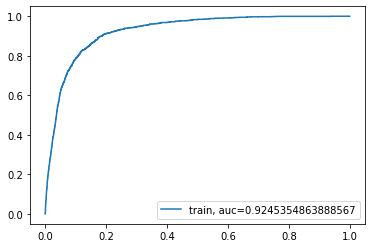

In [96]:
#ROC - train dataset
fpr, tpr, threshold = metrics.roc_curve(y_train, pred_prob_pca_rf_train)
auc_sc = metrics.auc(fpr, tpr)
print("ROC,AUC - train dataset", auc_sc)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc_sc))
plt.legend(loc = 4)
plt.show()

ROC,AUC - train dataset 0.8785482163778128


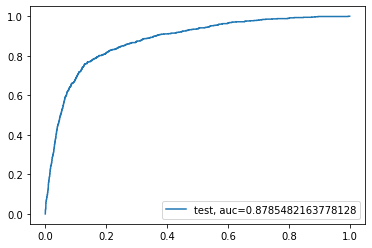

In [97]:
#ROC in test dataset
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_prob_pca_rf_test)
auc_sc = metrics.auc(fpr, tpr)
print("ROC,AUC - train dataset", auc_sc)
plt.plot(fpr, tpr, label = "test, auc=" + str(auc_sc))
plt.legend(loc = 4)
plt.show()

### Implementing Random Forest with all the features

In [98]:
rf_all_fea = RandomForestClassifier(class_weight='balanced', n_estimators = 1000, max_depth = 6, min_samples_split=5)

In [99]:
trained_rf_all_fea = rf_all_fea.fit(X_train, y_train)

In [100]:
preds_train_rf = trained_rf_all_fea.predict(X_train)
preds_test_rf = trained_rf_all_fea.predict(X_test)

pred_prob_train_rf = trained_rf_all_fea.predict_proba(X_train)[:,1]
pred_prob_test_rf = trained_rf_all_fea.predict_proba(X_test)[:,1]

In [101]:
acc_train_rf = metrics.accuracy_score(y_train, preds_train_rf)
acc_test_rf = metrics.accuracy_score(y_test, preds_test_rf)

print('Accuracy - train dataset:', acc_train_rf)
print('Accuracy - test dataset:', acc_test_rf)

print('Classification report - train dataset:', '\n', classification_report(y_train, preds_train_rf))
print('Classification report - test dataset:', '\n', classification_report(y_test, preds_test_rf))

Accuracy - train dataset: 0.9137619047619048
Accuracy - test dataset: 0.9127874680591045
Classification report - train dataset: 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95     19309
           1       0.48      0.81      0.60      1691

    accuracy                           0.91     21000
   macro avg       0.73      0.87      0.78     21000
weighted avg       0.94      0.91      0.92     21000

Classification report - test dataset: 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95      8251
           1       0.49      0.77      0.59       750

    accuracy                           0.91      9001
   macro avg       0.73      0.85      0.77      9001
weighted avg       0.94      0.91      0.92      9001



ROC,AUC - train dataset 0.9505788689340915


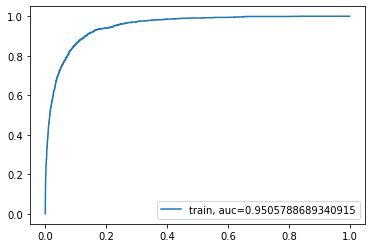

In [102]:
#ROC - train dataset
fpr, tpr, threshold = metrics.roc_curve(y_train, pred_prob_train_rf)
auc_train_rf = metrics.auc(fpr, tpr)
print("ROC,AUC - train dataset", auc_train_rf)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc_train_rf))
plt.legend(loc = 4)

ROC,AUC - test dataset 0.9208493515937463


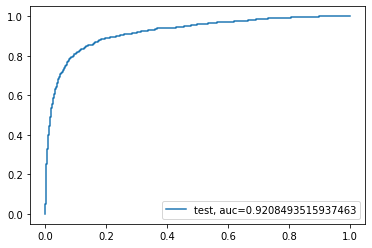

In [103]:
#ROC in test dataset
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_prob_test_rf)
auc_test_rf = metrics.auc(fpr, tpr)
print("ROC,AUC - test dataset", auc_test_rf)
plt.plot(fpr, tpr, label = "test, auc=" + str(auc_test_rf))
plt.legend(loc = 4)

## Implementing XgBoost for all the features

In [104]:
xgboost_fea = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.001, n_jobs=-1, max_depth=6, colsample_bytree=1, gamma=0.1,
                            cv = None, scoring='f1_weighted', reg_alpha=0, reg_lambda=1, eval_metric='auc',
                           objective='binary:hinge', booster = 'gbtree', tree_method = 'exact', min_child_weight = 15)

xgb_model_fea = xgboost_fea.fit(X_train, y_train)

In [105]:
preds_train_xgb = xgb_model_fea.predict(X_train)
preds_test_xgb = xgb_model_fea.predict(X_test)

acc_train_xgb = metrics.accuracy_score(y_train, preds_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test, preds_test_xgb)

print('Accuracy - train dataset:', acc_train_xgb)
print('Accuracy - test dataset:', acc_test_xgb)

print('Classification report - train dataset:', '\n', classification_report(y_train, preds_train_xgb))
print('Classification report - test dataset:', '\n', classification_report(y_test, preds_test_xgb))

Accuracy - train dataset: 0.9398095238095238
Accuracy - test dataset: 0.93222975224975
Classification report - train dataset: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97     19309
           1       0.61      0.68      0.64      1691

    accuracy                           0.94     21000
   macro avg       0.79      0.82      0.81     21000
weighted avg       0.94      0.94      0.94     21000

Classification report - test dataset: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      8251
           1       0.58      0.65      0.61       750

    accuracy                           0.93      9001
   macro avg       0.78      0.80      0.79      9001
weighted avg       0.94      0.93      0.93      9001



ROC,AUC - train dataset 0.8191553354684663


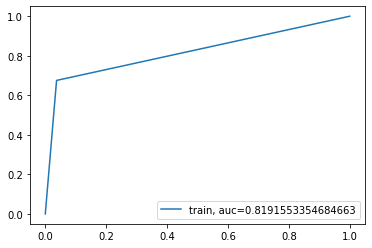

In [106]:
#ROC - train dataset
fpr, tpr, threshold = metrics.roc_curve(y_train, preds_train_xgb)
auc_sc_xgb = metrics.auc(fpr, tpr)
print("ROC,AUC - train dataset", auc_sc_xgb)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc_sc_xgb))
plt.legend(loc = 4)

ROC AUC in train dataset 0.8030328445036966


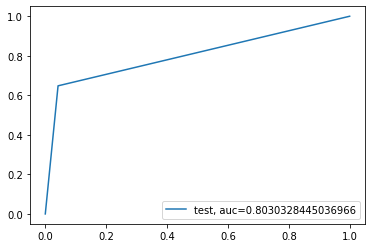

In [107]:
#ROC - train dataset
fpr, tpr, threshold = metrics.roc_curve(y_test, preds_test_xgb)
auc_sc_xgb = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc_sc_xgb)
plt.plot(fpr, tpr, label = "test, auc=" + str(auc_sc_xgb))
plt.legend(loc = 4)

## Overview

* We have implemented below listed learning algorithms: 
  * Logistic regression
  * Random forest classifier (with PCA and with all the features)
  * XGBoost
* After have a close look on our model building, we can say that the **Random Forest Classifier** with all the features is the **best candidate**.
* For this model XGBoost does not perform that well with all the features.

In [108]:
print('Accuracy - train dataset:', acc_train_rf)
print('Accuracy - test dataset:', acc_test_rf)
print("ROC,AUC - train dataset:", auc_train_rf)
print("ROC,AUC - test dataset:", auc_test_rf)

Accuracy - train dataset: 0.9137619047619048
Accuracy - test dataset: 0.9127874680591045
ROC,AUC - train dataset: 0.9505788689340915
ROC,AUC - test dataset: 0.9208493515937463


In [109]:
#Feature importances
fea_importance = trained_rf_all_fea.feature_importances_
cols = X.columns
#Find top 20 features
sorted_fea_imp = pd.DataFrame(sorted(zip(fea_importance, list(cols)), reverse=True), columns={'col_name','importance'})
sorted_fea_imp.head(20) 

,importance,col_name
0,0.115454,total_ic_mou_8
1,0.075866,last_day_rch_amt_8
2,0.075838,total_og_mou_8
3,0.059852,total_rech_amt_8
4,0.049972,arpu_8
5,0.044738,max_rech_amt_8
6,0.041503,roam_og_mou_8
7,0.039470,av_rech_amt_data_8
8,0.038699,loc_ic_mou_8
9,0.037660,loc_ic_t2m_mou_8


## Conclusion

* To predict churn of 9th month, month 8 is most important month. So, to predict a months' churn we should have a close look on the previous month. 
* As we can see from the Feature Importance table, "Total incoming" and "Total outgoing" minutes of the previous month are the top two deciding factors. If these two factors decreases in previous month than churning probability will also increase.
* Average revenue per user is the third important feature because if the revenue generating tendency of a user decreases he or she is more likely to churn.
* Company can offer discounted roaming outgoing packs to the users.
* Company should monitor the total recharge done by users, and offer some additional talk time with additional validity on the recharges.
* To keep the high valued customers, company can provide special discounts to the customers who are connected the network for more than an year. Also, can provide some kinds of premium packs.
* If any user has not been connected with your network or did not recharge for a long time than the company can connect to the user to know the reason of not using their network for a longer period of time or you can ask the user if they were facing any issues or they have any other concerns